In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
from os import listdir
from os.path import isfile, join

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

In [7]:
music= (pd.read_csv('music.csv'))

In [8]:
music.shape

(686, 4)

In [9]:
music.head()

,name,album,artist,mood
0,1999,1999,Prince,Happy
1,23,23,Blonde Redhead,Sad
2,9 Crimes,9,Damien Rice,Sad
3,99 Luftballons,99 Luftballons,Nena,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,Energetic


In [10]:
music=music[['name','album','artist','mood']]

In [12]:
music['mood'].value_counts()

Sad          197
Calm         195
Energetic    154
Happy        140
Name: mood, dtype: int64

In [13]:
import cv2

In [14]:
def prepdata(folder,classs):
    train_data=[]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        im_resize=np.reshape(img,(2304,1))
        train_data.append(im_resize)
    for i in range(0,len(train_data)):
        train_data[i]=np.append(train_data[i],[classs])
    
    return train_data

In [15]:
#assign 'angry'=0
data= prepdata('train/angry','0')
print(len(data))
#assign 'disgust'=1
temp= prepdata('train/disgust','1')
data=np.concatenate((data,temp))
print(len(data))


3995
4431


In [16]:
#assign 'fear'=2
temp= prepdata('train/fear','2')
data=np.concatenate((data,temp))
print(len(data))
#assign 'happy'=3
temp= prepdata('train/happy','3')
data=np.concatenate((data,temp))
print(len(data))

8528
15743


In [17]:
#assign 'neutral'=4
temp= prepdata('train/neutral','4')
data=np.concatenate((data,temp))
print(len(data))
#assign 'sad'=5
temp= prepdata('train/sad','5')
data=np.concatenate((data,temp))
print(len(data))
#assign 'surprise'=6
temp= prepdata('train/surprise','6')
data=np.concatenate((data,temp))
print(len(data))

20708
25538
28709


In [18]:
df=pd.DataFrame(data,index=None)
df.to_csv('train_final.csv',index=False)

In [19]:
df=pd.read_csv('train_final.csv')

In [20]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,2304
0,50,32,15,11,12,10,10,8,15,10,...,157,156,152,148,151,141,143,136,83,0
1,29,24,29,11,15,22,26,11,7,17,...,109,165,148,75,49,33,15,24,24,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,155,138,98,112,94,97,111,107,101,84,...,97,95,92,94,101,108,111,112,109,0
4,211,215,220,221,219,216,213,210,207,205,...,170,168,162,170,169,160,159,156,152,0


In [21]:
df['2304'].value_counts()

3    7215
4    4965
5    4830
2    4097
0    3995
6    3171
1     436
Name: 2304, dtype: int64

In [22]:
labels=df['2304']
df.drop(df.columns[[2304]],axis=1,inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,50,32,15,11,12,10,10,8,15,10,...,160,157,156,152,148,151,141,143,136,83
1,29,24,29,11,15,22,26,11,7,17,...,60,109,165,148,75,49,33,15,24,24
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,155,138,98,112,94,97,111,107,101,84,...,102,97,95,92,94,101,108,111,112,109
4,211,215,220,221,219,216,213,210,207,205,...,171,170,168,162,170,169,160,159,156,152


In [23]:
labels.head()

0    0
1    0
2    0
3    0
4    0
Name: 2304, dtype: int64

In [24]:
# Model / data parameters
num_classes = 7
input_shape = (48, 48, 1)
l = df

# Scale images to the [0, 1] range
l = l.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
#l = np.expand_dims(x_train, -1)
x_train=[]
for i in range(28709):
    x_train.append(np.array(l[i:i+1]).reshape(48,48,1))
x_train=np.array(x_train)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")

x_train shape: (28709, 48, 48, 1)
28709 train samples


In [25]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [26]:
# convert class vectors to binary class matrices
y_train =labels
y_train = keras.utils.to_categorical(y_train, num_classes)


In [27]:
model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(48,48,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3)) # Dropout, one form of regularization
model.add (Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add (MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add( Dropout(0.5))
#model.add(Flatten())
model.add(Dense(7, activation='softmax'))
#model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6400)              0

In [28]:
batch_size = 128
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [29]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.3,shuffle=True,verbose=1)

Epoch 1/20
157/157 [==============================] - 85s 463ms/step - loss: 1.4177 - accuracy: 0.3697 - val_loss: 8.0681 - val_accuracy: 0.0176
Epoch 2/20
157/157 [==============================] - 66s 419ms/step - loss: 1.2898 - accuracy: 0.4578 - val_loss: 9.6030 - val_accuracy: 0.0338
Epoch 3/20
157/157 [==============================] - 60s 385ms/step - loss: 1.2264 - accuracy: 0.4949 - val_loss: 10.9606 - val_accuracy: 0.0372
Epoch 4/20
157/157 [==============================] - 53s 338ms/step - loss: 1.1735 - accuracy: 0.5228 - val_loss: 9.9630 - val_accuracy: 0.0310
Epoch 5/20
157/157 [==============================] - 55s 351ms/step - loss: 1.1313 - accuracy: 0.5398 - val_loss: 9.6615 - val_accuracy: 0.0476
Epoch 6/20
157/157 [==============================] - 55s 352ms/step - loss: 1.0980 - accuracy: 0.5578 - val_loss: 10.1359 - val_accuracy: 0.0340
Epoch 7/20
157/157 [==============================] - 54s 346ms/step - loss: 1.0755 - accuracy: 0.5666 - val_loss: 10.7538 - val

In [30]:
from keras.models import model_from_json
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")

In [31]:
music=pd.read_csv('music.csv')

TypeError: Image data of dtype object cannot be converted to float

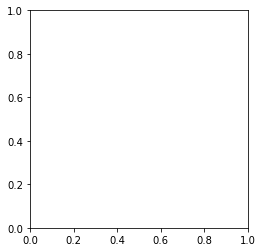

In [33]:
image = cv2.imread('PrivateTest_6035852.jpg',cv2.IMREAD_GRAYSCALE)

plt.imshow(image,cmap='gray')
plt.show()

In [36]:
music.head()

,name,album,artist,mood
0,1999,1999,Prince,Happy
1,23,23,Blonde Redhead,Sad
2,9 Crimes,9,Damien Rice,Sad
3,99 Luftballons,99 Luftballons,Nena,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,Energetic
